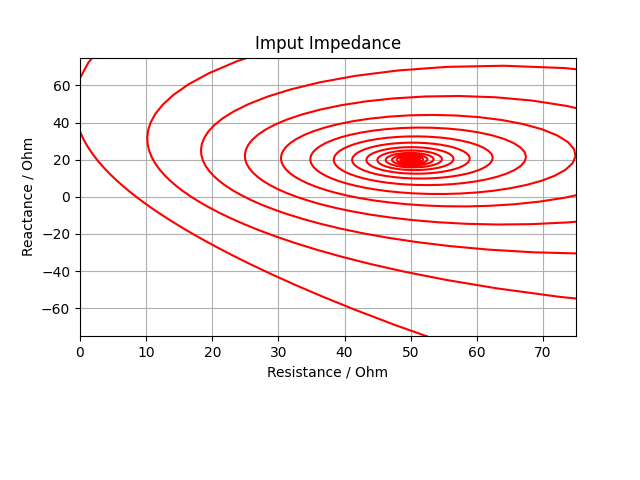

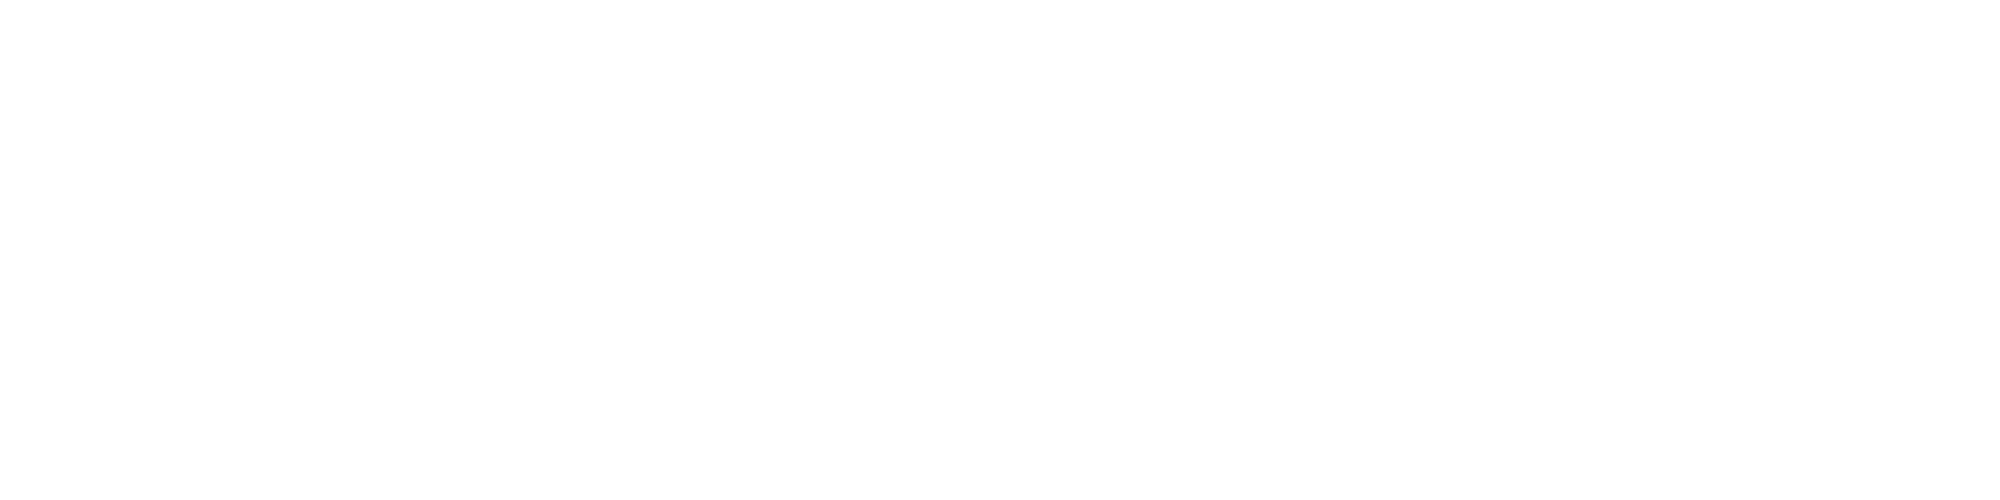

In [15]:
%matplotlib ipympl

import numpy as np
from functools import partial
import matplotlib.pyplot as plt

Z_C = 50 + 20j
Z_e = 0
ell = 10
alpha = 0.3
wavelength = 1
beta = 2 * np.pi / wavelength

def inp_imp(z, Zc, Ze, a, b):
    ze = Ze / Zc  # relative load impedance
    xy = np.arctanh(ze)
    zs = np.tanh(xy.real + a*z + 1j*(xy.imag + b*z))
    Zs = zs * Zc
    return Zs

zsteps = int(ell/wavelength * 100) + 1 # at least xx steps per wavelength
zs = ell*np.linspace(0, 1, zsteps, endpoint=True)
imps = inp_imp(zs, Z_C, Z_e, alpha, beta)
#for z, im in zip(zs, imps):
#    print(z, im)

fig = plt.figure(figsize=(20,5))
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.3)

# set up the plot as needed
ax.set_xlim((0, 1.5*Z_C.real))            
ax.set_ylim((-1.5*Z_C.real, 1.5*Z_C.real))
ax.set_xlabel('Resistance / Ohm')
ax.set_ylabel('Reactance / Ohm')
ax.grid()

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax.set_title('Imput Impedance')
ax.plot(imps.real, imps.imag, 'r-')
plt.show()
